# Titanic dataset from Kaggle

In [133]:

import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split
#import sklearn as sk
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression



%matplotlib inline
# To print multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data extraction and feature analysis

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


array(['S', 'C', 'Q', nan], dtype=object)

889

S    644
C    168
Q     77
Name: Embarked, dtype: int64

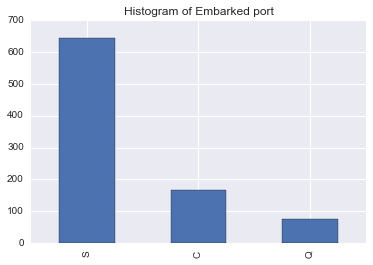

In [134]:
titanic_dataset = pd.read_csv("train.csv")
titanic_dataset.head()
titanic_dataset.describe()
titanic_dataset.info()
titanic_dataset.Embarked.unique()
titanic_dataset.Embarked.count()
titanic_dataset.Embarked.value_counts()
titanic_dataset.Embarked.value_counts().plot(kind='bar',title = "Histogram of Embarked port")


## Drop columns

Drop the features that are not necessary for the solution

In [135]:

titanic_dataset = titanic_dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
#titanic_dataset['Cabin'] = titanic_dataset['Cabin'].fillna('f')
titanic_dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Fare

1     71.2833
2      7.9250
3     53.1000
8     11.1333
9     30.0708
10    16.7000
11    26.5500
15    16.0000
17    13.0000
19     7.2250
Name: Fare, dtype: float64

Mean fare,0
Survived,
0,22.117887
1,48.395408


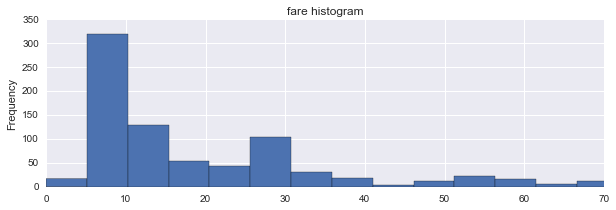

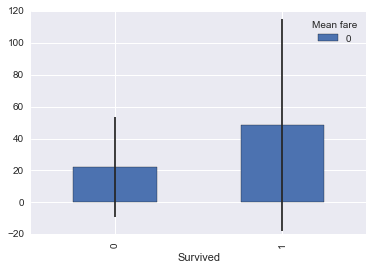

In [136]:
#fill NAN with median values
titanic_dataset['Fare'] = titanic_dataset['Fare'].fillna(titanic_dataset['Fare'].median())

titanic_survived_fare = titanic_dataset['Fare'][titanic_dataset['Survived'] == 1]
titanic_notsurvived_fare = titanic_dataset['Fare'][titanic_dataset['Survived'] == 0]

titanic_survived_fare.head(10)


average_fare = DataFrame([titanic_notsurvived_fare.mean(), titanic_survived_fare.mean()])
std_fare= DataFrame([titanic_notsurvived_fare.std(), titanic_survived_fare.std()])

titanic_dataset['Fare'].plot(kind = 'hist', title = "fare histogram", figsize=(10,3), bins = 100 , xlim = (0,70))
average_fare.index.names = ['Survived']
average_fare.columns.names = ['Mean fare']
average_fare.plot(kind = 'bar', yerr = std_fare )
average_fare.head()


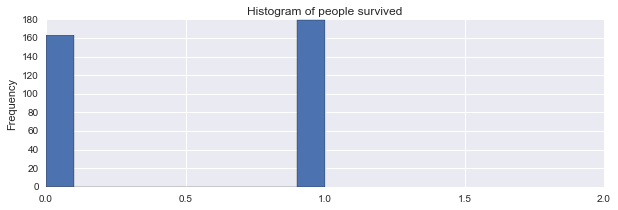

In [137]:

titanic_dataset['Family'] = titanic_dataset['SibSp']+titanic_dataset['Parch']
titanic_dataset['Family'].loc[titanic_dataset['Family'] >= 1 ] = 1
titanic_dataset['Family'].loc[titanic_dataset['Family'] == 0 ] = 0

titanic_dataset = titanic_dataset.drop(['SibSp','Parch'], axis=1)

#titanic_dataset['Family'] = titanic_dataset['Family'].astype('category')

#fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

titanic_dataset['Family'].loc[titanic_dataset['Survived'] == 1 ].plot(kind = 'hist' , figsize=(10,3),xlim =(0,2),title = "Histogram of people survived")
#axis.set_xticklabels(["With Family","Alone"], rotation=0)


## Family

('Number of empty cells', 714)


,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

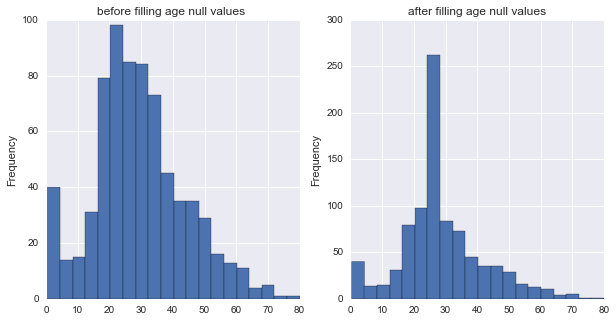

In [138]:
#age 
print("Number of empty cells" ,  titanic_dataset['Age'].count())
fig,(axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
titanic_dataset['Age'].plot(kind = 'hist',title = "before filling age null values " , bins = 20 , xlim = (0,titanic_dataset['Age'].max()),ax= axis1)
titanic_dataset['Age'] = titanic_dataset['Age'].fillna(titanic_dataset['Age'].median())
titanic_dataset.head(5)
titanic_dataset['Age'].plot(kind = 'hist',title = "after filling age null values", bins = 20 , xlim = (0,titanic_dataset['Age'].max()),ax=axis2)
titanic_dataset['Age'].describe()

## Sex

pandas.core.frame.DataFrame

,Survived,Pclass,Age,Fare,Embarked,Family,Child,Female,Male
0,0,3,22.0,7.2500,S,1,0.0,0.0,1.0
1,1,1,38.0,71.2833,C,1,0.0,1.0,0.0
2,1,3,26.0,7.9250,S,0,0.0,1.0,0.0
3,1,1,35.0,53.1000,S,1,0.0,1.0,0.0
4,0,3,35.0,8.0500,S,0,0.0,0.0,1.0


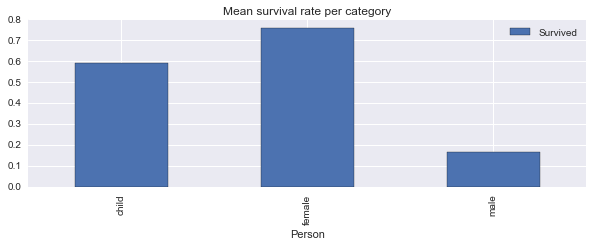

In [139]:
#sex

survived_male = titanic_dataset.loc[(titanic_dataset.Survived == 1) & (titanic_dataset.Sex == 'male') ]
survived_female = titanic_dataset.loc[(titanic_dataset.Survived == 1) & (titanic_dataset.Sex == 'female') ]
type(survived_male)

titanic_dataset['Person'] = titanic_dataset[['Age','Sex']].apply(lambda input : 'child' if input[0] < 16 else input[1] ,axis=1)

person_dummies_titanic  = pd.get_dummies(titanic_dataset['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']

output_age_mean = titanic_dataset[['Person','Survived']].groupby(['Person']).mean()

output_age_mean.plot(kind = 'bar',title = "Mean survival rate per category", figsize= (10,3))

titanic_dataset = titanic_dataset.join(person_dummies_titanic).drop(['Sex','Person'],axis = 1)

titanic_dataset.head(5)

## Pclass

In [140]:
titanic_dataset_dummies = pd.get_dummies(titanic_dataset['Pclass'])
titanic_dataset_dummies.columns = ['Class1','Class2','Class3']

titanic_dataset = titanic_dataset.join(titanic_dataset_dummies)
titanic_dataset = titanic_dataset.drop(['Pclass'],axis = 1)
titanic_dataset.head(5)

,Survived,Age,Fare,Embarked,Family,Child,Female,Male,Class1,Class2,Class3
0,0,22.0,7.2500,S,1,0.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,71.2833,C,1,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,7.9250,S,0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,53.1000,S,1,0.0,1.0,0.0,1.0,0.0,0.0
4,0,35.0,8.0500,S,0,0.0,0.0,1.0,0.0,0.0,1.0


## Embarked

,C,S,Q
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


,Survived,Age,Fare,Family,Child,Female,Male,Class1,Class2,Class3,C,S,Q
0,0,22.0,7.2500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,71.2833,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,26.0,7.9250,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,35.0,53.1000,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,35.0,8.0500,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


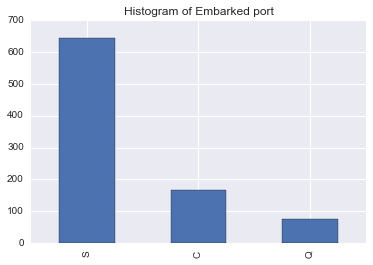

In [141]:
#plotting histogram of the categorical data
titanic_dataset.Embarked.value_counts().plot(kind='bar',title = "Histogram of Embarked port")

##titanic_dataset.Embarked.mode
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].fillna("S")
embarked_dummies = pd.get_dummies(titanic_dataset['Embarked'])
embarked_dummies.columns = ["C","S","Q"]
embarked_dummies.head(5)
titanic_dataset = titanic_dataset.join(embarked_dummies).drop(['Embarked'],axis =1 )
titanic_dataset.head(5)
##titanic_dataset = titanic_dataset.drop(titanic_dataset['Embarked'],axis = 1 )
##titanic_dataset.head(5)



## Split the test and training data

In [142]:
titanic_dataset_input = titanic_dataset.drop('Survived',axis = 1)
X_train,X_test,Y_train,Y_test = train_test_split(titanic_dataset_input, titanic_dataset['Survived'],test_size = 0.2)


## Running ML algorithm

In [143]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.81741573033707871

## Coefficients

In [144]:
coefficients = DataFrame(titanic_dataset.columns.delete(0))
coefficients.columns =['Features']
coefficients['estimates'] = pd.Series(logreg.coef_[0])

coefficients

,Features,estimates
0,Age,-0.019438
1,Fare,0.002344
2,Family,-0.463578
3,Child,0.631083
4,Female,1.533108
5,Male,-1.617709
6,Class1,1.092222
7,Class2,0.421010
8,Class3,-0.966750
9,C,0.498566
